In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

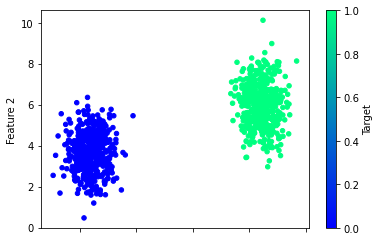

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-07-18 17:23:48.763139: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-18 17:23:48.763407: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

2022-07-18 17:23:48.828496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
24/24 [==============================] - 0s 580us/step - loss: 1.2324 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 527us/step - loss: 1.1664 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 531us/step - loss: 1.1241 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 560us/step - loss: 1.1013 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 466us/step - loss: 1.0586 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 435us/step - loss: 1.0260 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 482us/step - loss: 0.9988 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 447us/step - loss: 0.9637 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 457us/step - loss: 0.9551 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0

24/24 [==============================] - 0s 447us/step - loss: 0.6930 - accuracy: 0.5112
Epoch 81/100
24/24 [==============================] - 0s 462us/step - loss: 0.6932 - accuracy: 0.5083
Epoch 82/100
24/24 [==============================] - 0s 429us/step - loss: 0.6936 - accuracy: 0.4951
Epoch 83/100
24/24 [==============================] - 0s 448us/step - loss: 0.6929 - accuracy: 0.5128
Epoch 84/100
24/24 [==============================] - 0s 432us/step - loss: 0.6929 - accuracy: 0.5144
Epoch 85/100
24/24 [==============================] - 0s 452us/step - loss: 0.6932 - accuracy: 0.5062
Epoch 86/100
24/24 [==============================] - 0s 419us/step - loss: 0.6928 - accuracy: 0.5188
Epoch 87/100
24/24 [==============================] - 0s 422us/step - loss: 0.6926 - accuracy: 0.5255
Epoch 88/100
24/24 [==============================] - 0s 441us/step - loss: 0.6932 - accuracy: 0.5092
Epoch 89/100
24/24 [==============================] - 0s 431us/step - loss: 0.6941 - accuracy: 

<AxesSubplot:>

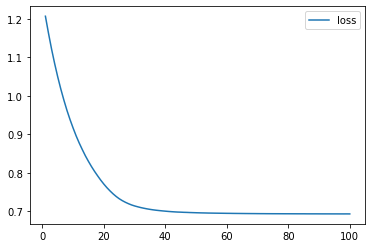

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

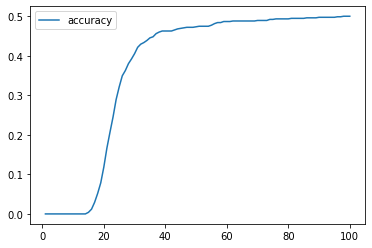

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6940 - accuracy: 0.4720
Loss: 0.6939876079559326, Accuracy: 0.47200000286102295


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

# 19.2.4 Neural Netwoks

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

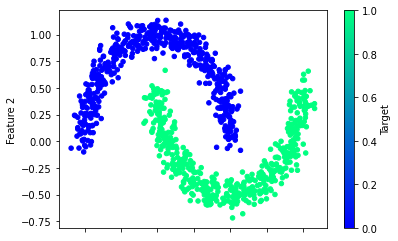

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 699us/step - loss: 0.7069 - accuracy: 0.3040
Epoch 2/100
24/24 [==============================] - 0s 668us/step - loss: 0.7007 - accuracy: 0.3680
Epoch 3/100
24/24 [==============================] - 0s 670us/step - loss: 0.6962 - accuracy: 0.4387
Epoch 4/100
24/24 [==============================] - 0s 696us/step - loss: 0.6937 - accuracy: 0.4973
Epoch 5/100
24/24 [==============================] - 0s 639us/step - loss: 0.6927 - accuracy: 0.5200
Epoch 6/100
24/24 [==============================] - 0s 606us/step - loss: 0.6922 - accuracy: 0.5267
Epoch 7/100
24/24 [==============================] - 0s 607us/step - loss: 0.6920 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 616us/step - loss: 0.6919 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 598us/step - loss: 0.6918 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 636us/step - loss: 0.6917 - accura

24/24 [==============================] - 0s 619us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
24/24 [==============================] - 0s 623us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 592us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 555us/step - loss: 0.6914 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 584us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 594us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 585us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 611us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 607us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 588us/step - loss: 0.6913 - accuracy: 

<AxesSubplot:>

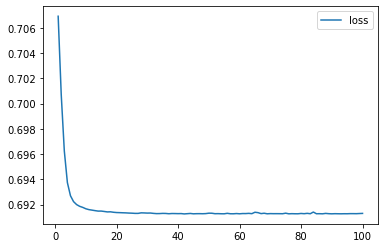

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

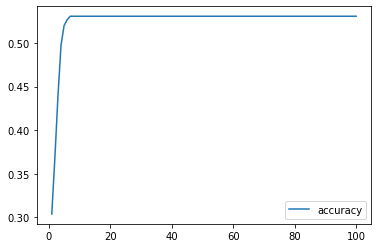

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

# 19.2.5 Multiple Neuron

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 541us/step - loss: 0.8651 - accuracy: 0.3908
Epoch 2/100
24/24 [==============================] - 0s 570us/step - loss: 0.7905 - accuracy: 0.4472
Epoch 3/100
24/24 [==============================] - 0s 506us/step - loss: 0.7495 - accuracy: 0.4340
Epoch 4/100
24/24 [==============================] - 0s 561us/step - loss: 0.7098 - accuracy: 0.4511
Epoch 5/100
24/24 [==============================] - 0s 543us/step - loss: 0.6711 - accuracy: 0.4975
Epoch 6/100
24/24 [==============================] - 0s 505us/step - loss: 0.6448 - accuracy: 0.5366
Epoch 7/100
24/24 [==============================] - 0s 512us/step - loss: 0.6115 - accuracy: 0.6183
Epoch 8/100
24/24 [==============================] - 0s 520us/step - loss: 0.5808 - accuracy: 0.7100
Epoch 9/100
24/24 [==============================] - 0s 502us/step - loss: 0.5615 - accuracy: 0.8457
Epoch 10/100
24/24 [==============================] - 0s 527us/step - loss: 0.5345 - accura

24/24 [==============================] - 0s 458us/step - loss: 0.2471 - accuracy: 0.8892
Epoch 82/100
24/24 [==============================] - 0s 451us/step - loss: 0.2563 - accuracy: 0.8869
Epoch 83/100
24/24 [==============================] - 0s 427us/step - loss: 0.2354 - accuracy: 0.9024
Epoch 84/100
24/24 [==============================] - 0s 455us/step - loss: 0.2567 - accuracy: 0.8932
Epoch 85/100
24/24 [==============================] - 0s 425us/step - loss: 0.2599 - accuracy: 0.8962
Epoch 86/100
24/24 [==============================] - 0s 452us/step - loss: 0.2132 - accuracy: 0.9145
Epoch 87/100
24/24 [==============================] - 0s 445us/step - loss: 0.2222 - accuracy: 0.9179
Epoch 88/100
24/24 [==============================] - 0s 424us/step - loss: 0.2446 - accuracy: 0.8950
Epoch 89/100
24/24 [==============================] - 0s 449us/step - loss: 0.2535 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 437us/step - loss: 0.2315 - accuracy: 

# 19.3.3 Encoding Categorical Variables

In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

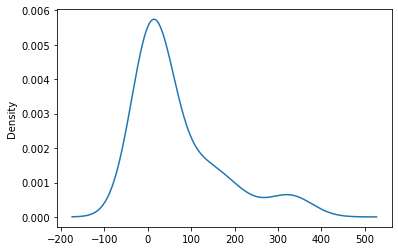

In [24]:
# Visualize the value counts
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

/Users/joyarah/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

/var/folders/ch/zbgzsphn6271nlynbvb5fnw00000gn/T/ipykernel_48801/3440917920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [67]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [68]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [69]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [70]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
